### Topic Extraction Steps:

1. **Loading Data**: Import the tokenized sentences from a CSV file.
2. **Document Concatenation**: Combine sentences based on their `paper_id` to form single-document entries.
3. **Topic Model Loading**: Initialize and load a BERTopic model for extracting topics from the concatenated documents.
4. **Topic Extraction**: Apply the BERTopic model to documents, identifying and extracting topics (approximately 10 minutes for processing).
5. **Topic Visualization**: Visualize the distribution, hierarchy, and frequency of topics using various BERTopic visualization methods.
6. **Model Saving**: Save the trained BERTopic model for future use, including its configuration and associated data.
7. **Topic Labeling**: Generate descriptive labels for each identified topic for easier interpretation and analysis.
8. **Topic Exploration**: Investigate the topics, including their labels, frequency, and representative documents.
9. **Representative Document Identification**: Determine the most representative documents for each topic based on their topic probabilities.


Load in the sentences

In [103]:
import pandas as pd
from tqdm import tqdm

# Load the original CSV file
df = pd.read_csv('../clean.csv')

Concatenate them based on the paper_id so that each entry represents a single document.

In [104]:
# Concatenate sentences based on 'paper_id'
concatenated_df = df.groupby('paper_id')['text'].apply(lambda x: ' '.join(x)).reset_index()

In [105]:
concatenated_df.to_csv('../concatenated.csv', index=False)

In [106]:
concatenated_df = pd.read_csv('../concatenated.csv')

In [107]:
concatenated_df

,paper_id,text
0,0000028b5cc154f68b8a269f6578f21e31f62977,according to current live statistics at the ti...
1,001c31c3d9313733a48cc15afcbceeba87c6a990,targeted therapy of pulmonary arterial hyperte...
2,002d57a50a1c54ef56b30a15c8a38070daf3ed36,the pandemic from the new coronavirus reveals ...
3,0044751d1601a255ad9cfc03b865d7a63dfc4e29,the next biggest disruption in medical imaging...
4,0044e5404a906a0e00ff53c36e56dc21a4d4c37c,cOVID-19 is not just a name now. it has become...
...,...,...
9856,ffb2e3383d60dcee77b5ce6ef69061050df90f7f,comprehensively exploring what factors might i...
9857,ffce83247a944b8059d28c3b80af95fb09e02638,enteroviruses of the Piconaviridae family are ...
9858,ffea7ba3e851069566953f62c666856312ef5e10,background CD4 T cells are crucial for the gen...
9859,ffeb5183a5edb2e7477d21b217cd72ccb07c51b5,impaired sleep may be a causal factor in the p...


Load BERTopic model for topic extraction

In [108]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

In [109]:
# Each entry in the concatenated df is a paper
documents = concatenated_df['text'].tolist()

In [110]:
# Initialize BERTopic with KeyBERTInspired representation model
model = BERTopic(representation_model=KeyBERTInspired(), calculate_probabilities=True, nr_topics=35, n_gram_range=(1, 3))

Extract the topics from the documents (this takes about 20 min)

In [111]:
# Fit the model and transform data into topics
topics, probabilities = model.fit_transform(documents)

In [112]:
# Get the most frequent topics
most_frequent_topics = model.get_topic_freq()
print(most_frequent_topics)

    Topic  Count
6      -1   3572
0       0   2445
1       1   1343
5       2    359
21      3    240
3       4    180
8       5    179
18      6    175
9       7    131
14      8    117
11      9    110
16     10    104
10     11     99
34     12     83
25     13     76
23     14     62
4      15     61
2      16     61
7      17     55
29     18     50
19     19     46
24     20     40
28     21     39
30     22     30
27     23     30
20     24     28
15     25     24
22     26     21
32     27     20
33     28     15
17     29     15
31     30     14
26     31     14
12     32     12
13     33     11


In [113]:
# Visualize the topics
model.visualize_topics()

In [114]:
model.visualize_term_rank()

In [115]:
model.visualize_barchart()

In [116]:
model.visualize_heatmap()

In [117]:
model.visualize_hierarchy()

In [118]:
# Save the model
embedding_model = "sentence-transformers/all-MiniLM-L6-v2"
model.save("../BERTopic_model", serialization="safetensors", save_ctfidf=True, save_embedding_model=embedding_model)

In [119]:
model = BERTopic.load("../BERTopic_model")

Topic labels

In [120]:
# Create a list of labels for each topic
labels = model.generate_topic_labels(topic_prefix=False)

In [121]:
for label in labels:
    print(label)

data_pandemic_analysis
vaccine_infection_virus
health_healthcare_medical
viruses_viral_virus
cells_cell_proteins
education_digital_learning
antimicrobial_antibiotic_antibiotics
diabetes_hypertension_glucose
climate change_pollution_climate
molecular_molecules_ligand
dementia_elderly_older adults
vitamin_of vitamin_psoriasis
dietary_nutrition_foods
authors declare no_no conflicts of_declare no conflicts
chemotherapy_breast cancer_cancer
editors_the authors declare_manuscript
benzotriazole_compounds_metabolites
machine learning_classification_datasets
banks_financial_bank
medications_medication_prescription
muscle mass_sarcopenia_muscle
retinal_cataract_lenses
tobacco use_tobacco_of tobacco
innovation_technology_knowledge
multiple sclerosis_patients with ms_living with ms
tb infection_tuberculosis_active tb
wearables_wearable_smartwatch
and documentclass12ptminimal usepackageamsmath_documentclass12ptminimal usepackageamsmath usepackagewasysym_usepackageupgreek setlengthoddsidemargin69pt 

Topics Exploration

In [122]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3572,-1_data_pandemic_analysis_research,"[data, pandemic, analysis, research, covid19, ...",NaN
1,0,2445,0_vaccine_infection_virus_viral,"[vaccine, infection, virus, viral, disease, co...",NaN
2,1,1343,1_health_healthcare_medical_patients,"[health, healthcare, medical, patients, cancer...",NaN
3,2,359,2_viruses_viral_virus_rna,"[viruses, viral, virus, rna, infected, strains...",NaN
4,3,240,3_cells_cell_proteins_cellular,"[cells, cell, proteins, cellular, immune, gene...",NaN
5,4,180,4_education_digital_learning_teaching,"[education, digital, learning, teaching, techn...",NaN
6,5,179,5_antimicrobial_antibiotic_antibiotics_bacterial,"[antimicrobial, antibiotic, antibiotics, bacte...",NaN
7,6,175,6_diabetes_hypertension_glucose_mortality,"[diabetes, hypertension, glucose, mortality, s...",NaN
8,7,131,7_climate change_pollution_climate_environmental,"[climate change, pollution, climate, environme...",NaN
9,8,117,8_molecular_molecules_ligand_nanoparticles,"[molecular, molecules, ligand, nanoparticles, ...",NaN


In [123]:
type(model.get_topic_info())

pandas.core.frame.DataFrame

In [124]:
model.get_document_info(documents).sort_values(by='Topic')

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
4930,To the EditorThe coronavirus disease 2019 COV...,-1,-1_data_pandemic_analysis_research,"[data, pandemic, analysis, research, covid19, ...",NaN,data - pandemic - analysis - research - covid1...,False
5146,we find ourselves in a time of crisis. here in...,-1,-1_data_pandemic_analysis_research,"[data, pandemic, analysis, research, covid19, ...",NaN,data - pandemic - analysis - research - covid1...,False
5145,many factors come into play and work to affect...,-1,-1_data_pandemic_analysis_research,"[data, pandemic, analysis, research, covid19, ...",NaN,data - pandemic - analysis - research - covid1...,False
5126,pregnancy is among the most important events i...,-1,-1_data_pandemic_analysis_research,"[data, pandemic, analysis, research, covid19, ...",NaN,data - pandemic - analysis - research - covid1...,False
5125,this was a retrospective analysis of a nationw...,-1,-1_data_pandemic_analysis_research,"[data, pandemic, analysis, research, covid19, ...",NaN,data - pandemic - analysis - research - covid1...,False
...,...,...,...,...,...,...,...
1890,the sudden amplification in road traffic over ...,33,33_plastics_microplastics_bioplastics_micropla...,"[plastics, microplastics, bioplastics, micropl...",NaN,plastics - microplastics - bioplastics - micro...,False
6573,"currently, petroleum-based plastics, which are...",33,33_plastics_microplastics_bioplastics_micropla...,"[plastics, microplastics, bioplastics, micropl...",NaN,plastics - microplastics - bioplastics - micro...,False
9459,since the creation of the first synthetic poly...,33,33_plastics_microplastics_bioplastics_micropla...,"[plastics, microplastics, bioplastics, micropl...",NaN,plastics - microplastics - bioplastics - micro...,False
5084,indian ship building industry started in the a...,33,33_plastics_microplastics_bioplastics_micropla...,"[plastics, microplastics, bioplastics, micropl...",NaN,plastics - microplastics - bioplastics - micro...,False


In [125]:
document_info = model.get_document_info(documents).sort_values(by='Topic')
document_info = document_info.reset_index()

In [126]:
print(document_info)

      index                                           Document  Topic  \
0      4930   To the EditorThe coronavirus disease 2019 COV...     -1   
1      5146  we find ourselves in a time of crisis. here in...     -1   
2      5145  many factors come into play and work to affect...     -1   
3      5126  pregnancy is among the most important events i...     -1   
4      5125  this was a retrospective analysis of a nationw...     -1   
...     ...                                                ...    ...   
9856   1890  the sudden amplification in road traffic over ...     33   
9857   6573  currently, petroleum-based plastics, which are...     33   
9858   9459  since the creation of the first synthetic poly...     33   
9859   5084  indian ship building industry started in the a...     33   
9860     88  as plastic pollution has become an increasing ...     33   

                                                   Name  \
0                    -1_data_pandemic_analysis_research   
1    

In [127]:
most_frequent_topics = model.get_topic_freq()
most_frequent_topics['Label'] = most_frequent_topics['Topic'].apply(lambda x: labels[x] if x < len(labels) else 'N/A')
print(most_frequent_topics)

    Topic  Count                                              Label
6      -1   3572                 plastics_microplastics_bioplastics
0       0   2445                             data_pandemic_analysis
1       1   1343                            vaccine_infection_virus
5       2    359                          health_healthcare_medical
21      3    240                                viruses_viral_virus
3       4    180                                cells_cell_proteins
8       5    179                         education_digital_learning
18      6    175               antimicrobial_antibiotic_antibiotics
9       7    131                      diabetes_hypertension_glucose
14      8    117                   climate change_pollution_climate
11      9    110                         molecular_molecules_ligand
16     10    104                      dementia_elderly_older adults
10     11     99                       vitamin_of vitamin_psoriasis
34     12     83                            diet

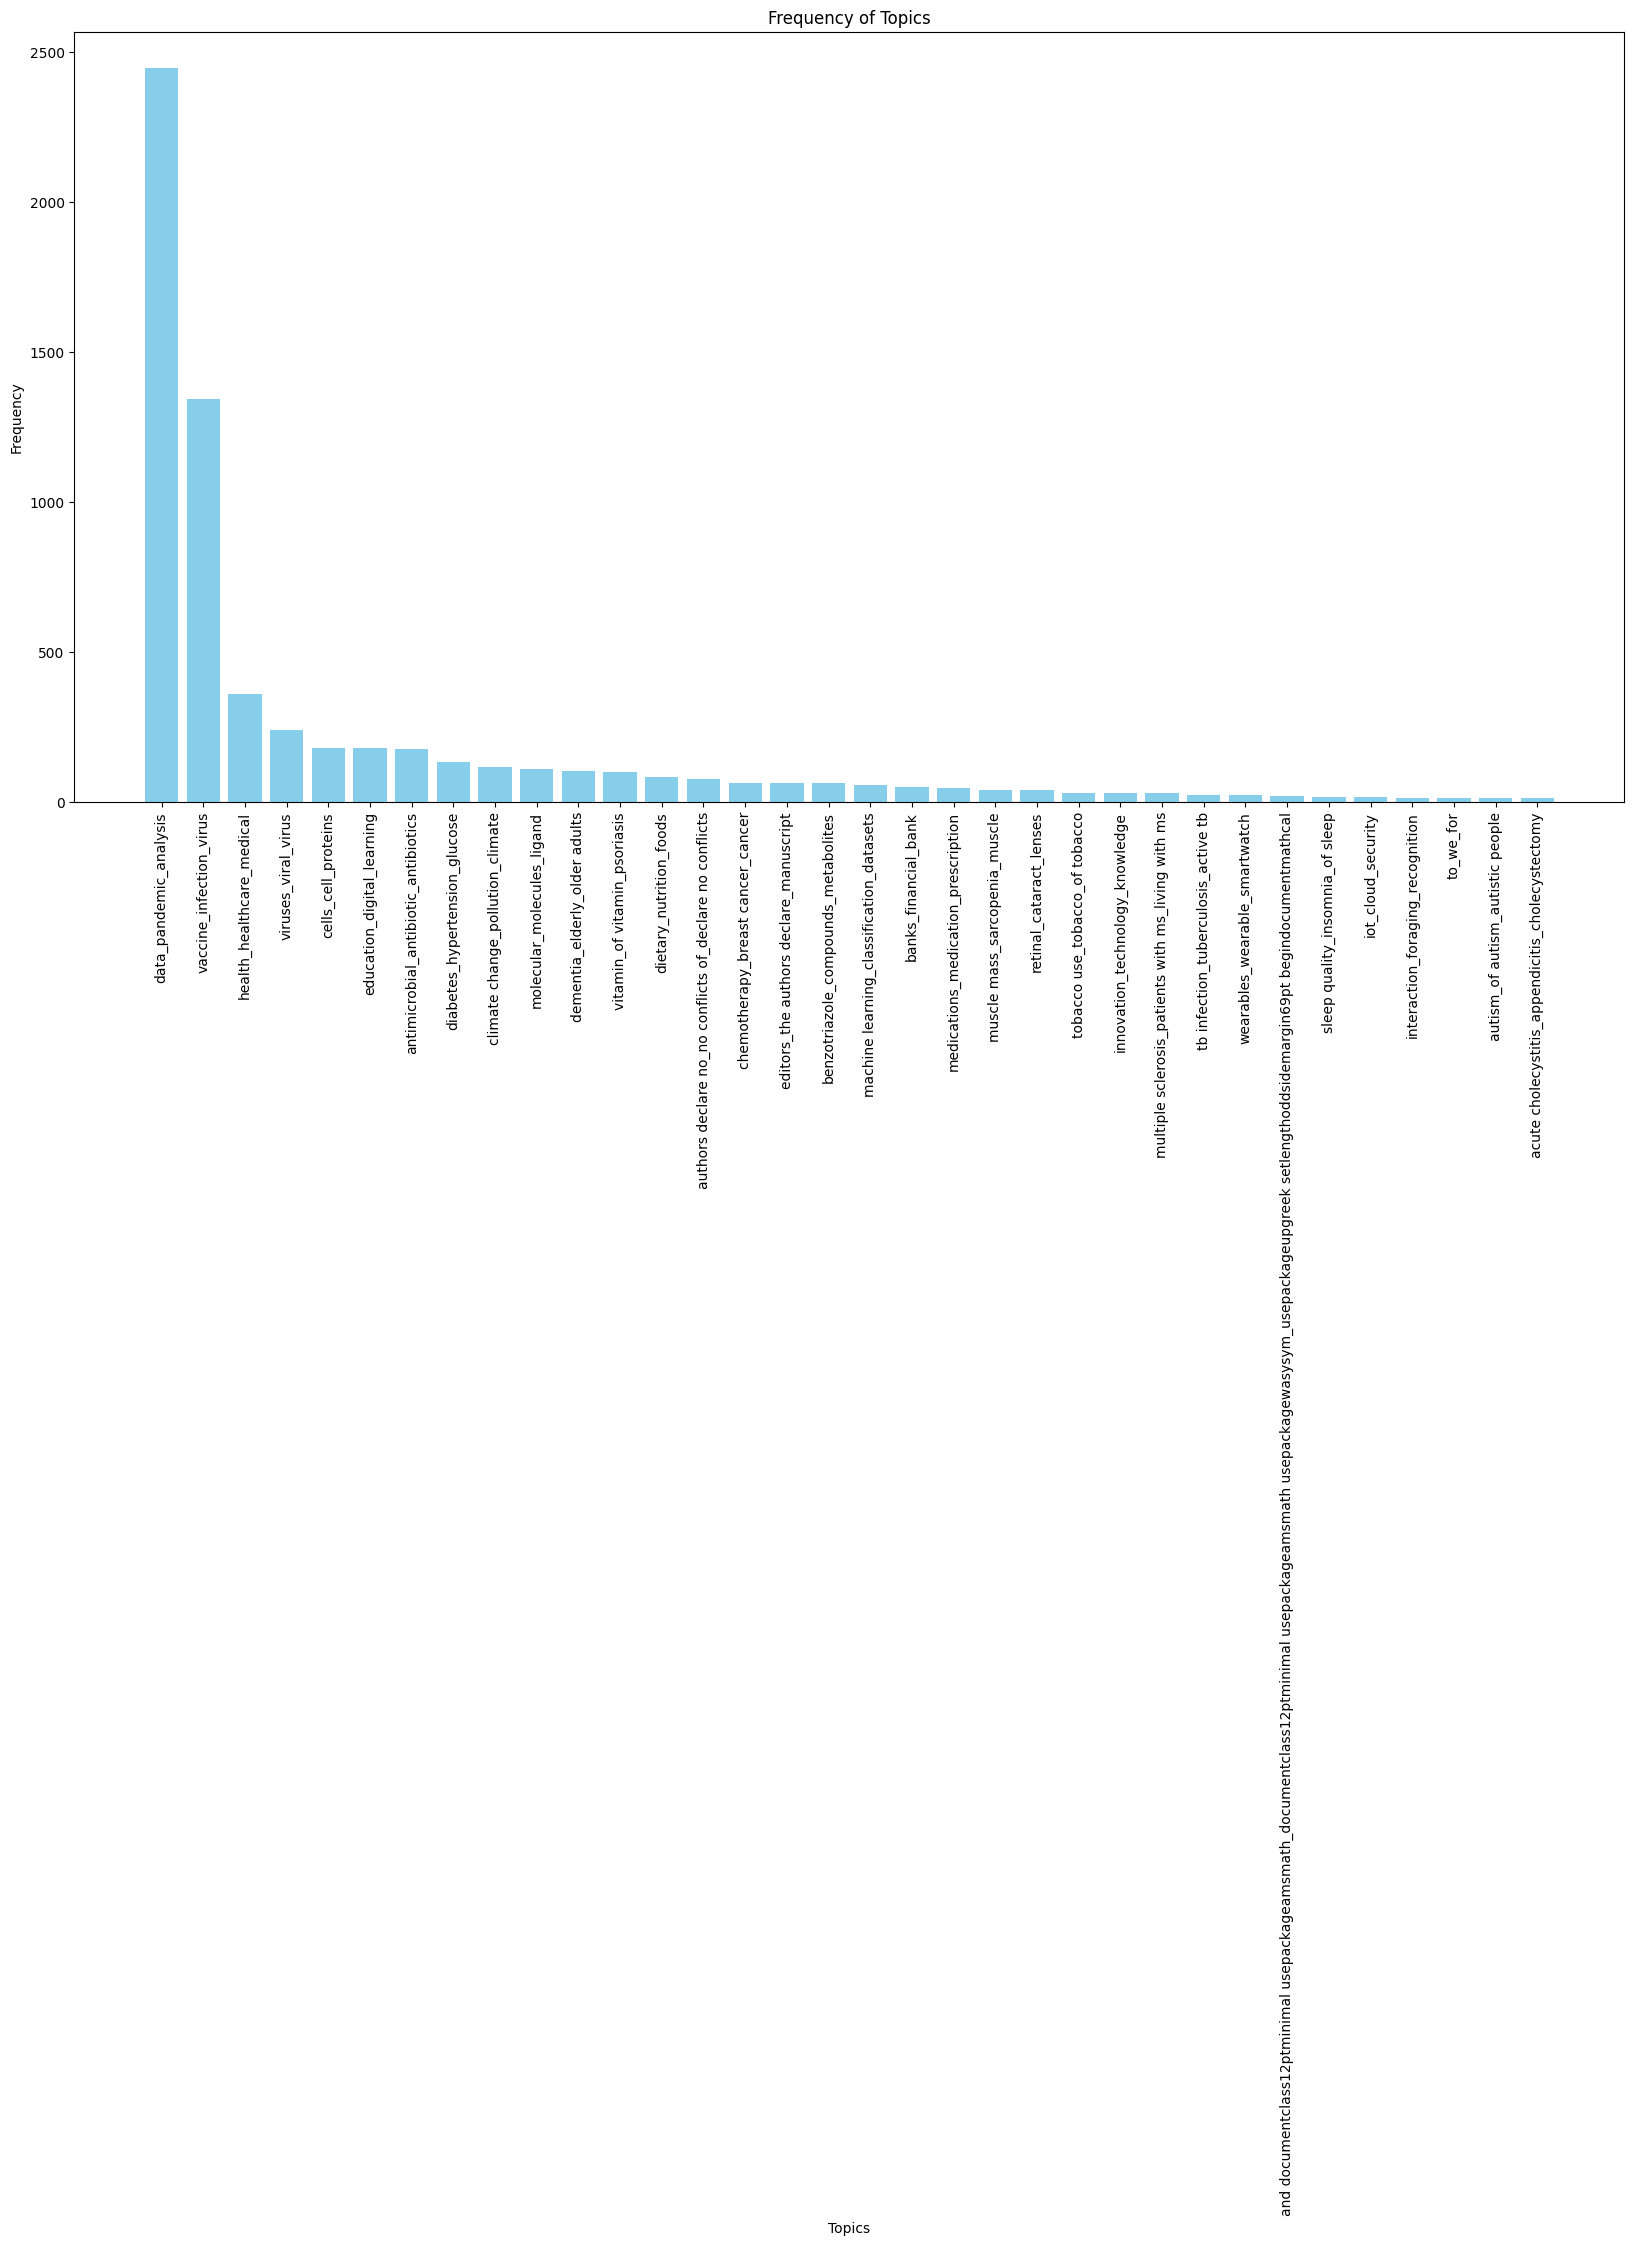

In [128]:
import matplotlib.pyplot as plt

# Filter out topic -1
filtered_topics = most_frequent_topics[most_frequent_topics['Topic'] != -1]

# Sort topics by frequency
sorted_topics = filtered_topics.sort_values(by='Count', ascending=True)

# Adjusting figure size for a vertical layout
plt.figure(figsize=(20, 10))  # Wider figure to accommodate all topics

# Creating a vertical bar chart
plt.bar(filtered_topics['Label'], filtered_topics['Count'], color='skyblue')

# Adding labels and title
plt.ylabel('Frequency')
plt.xlabel('Topics')
plt.title('Frequency of Topics')

# Rotating x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Adjust layout for better fit and readability
plt.tight_layout()

# Display the plot
plt.show()

In [129]:
most_frequent_topics.to_csv('../most_frequent_topics.csv', index=False)

Find the most representative documents

In [130]:
import numpy as np
def find_representative_docs(documents, topics, probabilities, n=3):
    """
    Find the most representative documents for each topic.

    Parameters:
    - documents: List of documents.
    - topics: Array of topic assignments for each document.
    - probabilities: Matrix of topic probabilities for each document.
    - n: Number of representative documents to find per topic.

    Returns:
    - A dictionary with topics as keys and lists of indices of the n most representative
      documents as values.
    """
    probabilities = np.array(probabilities)
    representative_docs = {}

    # Convert topics to numpy array for easier handling
    topics = np.array(topics)

    print(f"Documents: {len(documents)}, Topics: {topics.shape}, Probabilities shape: {probabilities.shape}")

    unique_topics = set(topics)
    if -1 in unique_topics:
        unique_topics.remove(-1)

    for topic in unique_topics:
        # Correctly identify documents belonging to the current topic
        topic_docs_indices = np.flatnonzero(topics == topic)

        if len(topic_docs_indices) == 0:
            continue  # If no documents for the topic, skip it

        # Get the probabilities for documents in this topic
        topic_probabilities = probabilities[topic_docs_indices, topic]

        # Identify the indices of the top n documents with the highest probability for this topic
        top_n_indices = np.argsort(-topic_probabilities)[:n]
        representative_doc_indices = topic_docs_indices[top_n_indices]

        representative_docs[topic] = representative_doc_indices.tolist()

        print(f"Topic {topic}: {representative_doc_indices}")

    return representative_docs


In [132]:
representative_docs = find_representative_docs(documents, topics, probabilities, n=3)

Documents: 9861, Topics: (9861,), Probabilities shape: (9861, 34)
Topic 0: [6947 6390 2309]
Topic 1: [5297 5134 5144]
Topic 2: [  12 3184 8247]
Topic 3: [ 220 5558 5397]
Topic 4: [4001 1576 1510]
Topic 5: [  18 6971 6969]
Topic 6: [ 113 6718 6701]
Topic 7: [6682 5177 2715]
Topic 8: [6165 6404 5405]
Topic 9: [  62 6036 2919]
Topic 10: [ 104 5124 5390]
Topic 11: [7934 3570 3480]
Topic 12: [4903 7966 5082]
Topic 13: [2729 5844 3990]
Topic 14: [ 230 4867 4882]
Topic 15: [   7 9640 9490]
Topic 16: [4935 6018 9345]
Topic 17: [9797 9695 5797]
Topic 18: [ 495 5266 5507]
Topic 19: [ 124 8966 8248]
Topic 20: [5375 4996 8397]
Topic 21: [7431 1140 1259]
Topic 22: [3054 5926 5268]
Topic 23: [9546 5376 4301]
Topic 24: [ 161 9482 8552]
Topic 25: [ 92 275 908]
Topic 26: [ 594  738 8801]
Topic 27: [6005 1294 1514]
Topic 28: [ 808 1524 1752]
Topic 29: [ 108 1894 2531]
Topic 30: [663 692 968]
Topic 31: [ 280 1763 3808]
Topic 32: [  81 1587 2738]
Topic 33: [  88 1890 2638]


In [133]:
df_representative_docs = pd.DataFrame.from_dict(representative_docs, orient='index')
df_probabilities = pd.DataFrame(probabilities)

df_representative_docs.to_csv('../representative_docs.csv', index=False)
df_probabilities.to_csv('../probabilities.csv', index=False)

### Summarization Steps:

1. **Topic Categorization**: Use BERTopic to sort documents into topics.
2. **Keyword Extraction**: Get keywords for each topic to help find important sentences.
3. **Content Extraction**: Choose sentences from documents that have these keywords.
4. **Extractive Summarization**: Use LexRank to find and keep the most important sentences.
5. **Abstract Summarization**: Turn the short summaries into easy-to-understand final summaries with BART.

In [134]:
from transformers import pipeline
from tqdm import tqdm
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
import pandas as pd

# Load your previously saved BERTopic model
model = BERTopic.load("../BERTopic_model")
abstract_summarizer = pipeline('summarization', model='facebook/bart-large-cnn')


In [135]:
def store_topic_keywords(model):
    """
    Extracts and stores keywords for each topic in a BERTopic model.

    Parameters:
    - model: A BERTopic model instance.

    Returns:
    - A dictionary with topic numbers as keys and lists of (keyword, score) tuples as values.
    """
    topic_keywords = {}
    topics = model.get_topics()
    
    # Iterate through each topic in the model
    for topic_num in topics.keys():
        # For each topic, extract keywords and their scores
        keywords = model.get_topic(topic_num)
        
        # Store the keywords and their scores if they are not None or boolean
        if keywords and isinstance(keywords, list):
            topic_keywords[topic_num] = keywords
        else:
            print(f"Warning: No valid keywords found for topic {topic_num}.")
    
    return topic_keywords

# Usage
topic_keywords = store_topic_keywords(model)

# To access keywords for a specific topic, say topic 0
print("Keywords for topic 0:", topic_keywords.get(0))
print(type(topic_keywords.get(0)))
print(type(topic_keywords))

Keywords for topic 0: [['vaccine', 0.5330634117126465], ['infection', 0.45629286766052246], ['virus', 0.4545660614967346], ['viral', 0.4526919722557068], ['disease', 0.4140316843986511], ['covid19', 0.3130788207054138], ['risk', 0.21692711114883423], ['patients', 0.21592333912849426], ['protein', 0.20849952101707458], ['sarscov2', 0.20655903220176697]]
<class 'list'>
<class 'dict'>


In [136]:
from tqdm import tqdm

def extract_sentences_with_keywords(documents, topic_keywords_dict):
    """
    For each topic, extract sentences from all documents that contain the topic's keywords.

    Parameters:
    - documents: List of all documents.
    - topic_keywords_dict: Dictionary with topics as keys and lists of (keyword, score) tuples as values.

    Returns:
    - A dictionary with topics as keys and concatenated sentences containing keywords as values.
    """
    sentences_by_topic = {}
    for topic, keywords_list in tqdm(topic_keywords_dict.items(), desc="Processing topics"):
        if topic == -1:
            continue  # Skip the -1 topic

        # Extract the keywords for the current topic
        topic_keywords = [word for word, _ in keywords_list]
        topic_sentences = []

        # Iterate over representative documents for the current topic
        for doc_idx in tqdm(representative_docs[topic], desc=f"Scanning representative documents for topic {topic}", leave=False):
            doc = documents[doc_idx]
            sentences = doc.split('. ')
            for sentence in sentences:
                if any(keyword.lower() in sentence.lower() for keyword in topic_keywords):  # Case-insensitive match
                    topic_sentences.append(sentence)
        
        # Only add non-empty collections of sentences
        if topic_sentences:
            sentences_by_topic[topic] = " ".join(topic_sentences)
        else:
            print(f"No sentences found containing keywords for topic {topic}.")

    return sentences_by_topic


Only run this if you don't want to rerun the topic extraction code. ***Requires converting representative_docs back into a dictionary***.

In [137]:
#representative_docs = pd.read_csv('../representative_docs.csv')
#probabilities = pd.read_csv('../probabilities.csv')
#concatenated_df = pd.read_csv('../concatenated.csv')
#documents = concatenated_df['text'].tolist()

In [138]:
from tqdm import tqdm

def extract_sentences_with_keywords(documents, topic_keywords_dict):
    """
    For each topic, extract sentences from all documents that contain the topic's keywords.

    Parameters:
    - documents: List of all documents.
    - topic_keywords_dict: Dictionary with topics as keys and lists of (keyword, score) tuples as values.

    Returns:
    - A dictionary with topics as keys and concatenated sentences containing keywords as values.
    """
    sentences_by_topic = {}
    for topic, keywords_list in tqdm(topic_keywords_dict.items(), desc="Processing topics"):
        # Extract the keywords for the current topic
        topic_keywords = [word for word, _ in keywords_list]
        topic_sentences = []

        if topic == -1:
            continue  # Skip the -1 topic

        # Iterate over representative documents for the current topic
        doc_indices = representative_docs.get(topic, [])
        for doc_idx in tqdm(doc_indices, desc=f"Scanning documents for topic {topic}", leave=False):
            doc = documents[doc_idx]
            sentences = doc.split('. ')
            for sentence in sentences:
                if any(keyword.lower() in sentence.lower() for keyword in topic_keywords):  # Case-insensitive match
                    topic_sentences.append(sentence)
        
        # Only add non-empty collections of sentences
        if topic_sentences:
            sentences_by_topic[topic] = " ".join(topic_sentences)
        else:
            print(f"No sentences found containing keywords for topic {topic}.")

    return sentences_by_topic


In [139]:
sentences_by_topic = extract_sentences_with_keywords(documents, topic_keywords)

Processing topics:  77%|███████▋  | 27/35 [00:00<00:00, 262.10it/s]

No sentences found containing keywords for topic 26.


Processing topics: 100%|██████████| 35/35 [00:00<00:00, 259.47it/s]


In [140]:
print(len(sentences_by_topic))

33


In [141]:
def summarize_with_lexrank(sentences_by_topic, num_sentences=3):
    """
    Summarize the concatenated sentences for each topic using LexRank.

    Parameters:
    - sentences_by_topic: A dictionary with topics as keys and concatenated sentences as values.

    Returns:
    - A dictionary with topics as keys and LexRank summaries as values.
    """
    lexrank_summary = {}
    summarizer = LexRankSummarizer()
    
    for topic, sentences in tqdm(sentences_by_topic.items(), desc="Summarizing"):
        parser = PlaintextParser.from_string(sentences, Tokenizer("english"))
        # Adjust the number of sentences in the summary if needed
        summary = summarizer(parser.document, num_sentences)
        summarized_text = " ".join([str(sentence) for sentence in summary])
        lexrank_summary[topic] = summarized_text
    
    return lexrank_summary

In [142]:
lexrank_summaries = summarize_with_lexrank(sentences_by_topic)

Summarizing: 100%|██████████| 33/33 [00:01<00:00, 23.93it/s]


In [143]:
df_extractive_summaries = pd.DataFrame.from_dict(lexrank_summaries, orient='index')
df_extractive_summaries.to_csv('../extractive_summaries.csv', index=False)

In [144]:
df_extractive_summaries

,0
0,the world has comprehensively changed once the...
1,cancer is frequent in dogs and is by far their...
2,then we examined whether replication could als...
3,virus infection of mammalian cells induces sig...
4,scrolling through social media platforms has t...
5,"iBS etiology is still not well understood, how..."
6,background H eart failure HF is an emerging ep...
7,nitrogen dioxide NO2 is an important chemical ...
8,according to the importance of rapid tests in ...
9,"for example, the COVID-19 pandemic has require..."


In [161]:
from transformers import BartTokenizer

def chunk_text(text, tokenizer, max_length=1024):
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    # Initialize chunks
    chunks = []
    current_chunk = []
    current_length = 0
    for token in tokens:
        current_chunk.append(token)
        current_length += 1
        if current_length == max_length:
            chunks.append(tokenizer.convert_tokens_to_string(current_chunk))
            current_chunk = []
            current_length = 0
    # Add the last chunk if it's not empty
    if current_chunk:
        chunks.append(tokenizer.convert_tokens_to_string(current_chunk))
    return chunks


In [166]:
from transformers import BartForConditionalGeneration

def summarize_chunks(chunks, model, tokenizer):
    summaries = []
    for chunk in tqdm(chunks, desc="Summarizing Chunks"):
        inputs = tokenizer([chunk], return_tensors="pt", max_length=1024, truncation=True, padding="max_length")
        summary_ids = model.generate(inputs["input_ids"], num_beams=4, max_length=200, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        summaries.append(summary)
    return summaries

In [167]:
from transformers import BartTokenizer, BartForConditionalGeneration

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

final_summaries = {}
for topic, text in tqdm(lexrank_summaries.items(), desc="Summarizing Topics"):
    chunks = chunk_text(text, tokenizer)
    summaries = summarize_chunks(chunks, model, tokenizer)
    final_summary = " ".join(summaries)
    final_summaries[topic] = final_summary


Summarizing Topics:   0%|          | 0/33 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/3 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/10 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/5 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/12 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/1 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/3 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/3 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/3 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/3 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/3 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/2 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/8 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/1 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/3 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/1 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/1 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/11 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/2 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/5 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/10 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/4 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/2 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/6 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/13 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/7 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/16 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/8 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/6 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/7 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/25 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/7 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/4 [00:00<?, ?it/s]

Summarizing Chunks:   0%|          | 0/4 [00:00<?, ?it/s]

In [168]:
final_summaries

{0: 'The World Health Organization announced the Novel Coronavirus SARS-CoV-2 COVID-19 as a pandemic outbreak on the 11th of March, 20201. Since the WHO has warned about the beginning of the pandemic in March, basic protective equipment and safety protocols have not been always available in many medical institutions. healthcare workers are experiencing unprecedented pressure from stressors including but not limited to enormous workload, virus exposure, and inadequate PPE. The study followed a group of workers who were continuously and exclusively engaged in the treatment of patients with COVID-19 in Central Italy. The main stressors were prolonged periods of work in isolation, high workloads, compassion fatigue, and a lack of time for physical activity, meditation, or relaxation. Most of the workers who had contracted the infection were completely asymptomatic. SARS-CoV-2 machine learning smartphone application is vital in most outbreaks. Users learn how to perform valid tests through 

In [169]:
df_final_summaries = pd.DataFrame.from_dict(final_summaries, orient='index')
df_final_summaries.to_csv('../final_summaries.csv', index=False)